In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
from mpl_toolkits.mplot3d import Axes3D


# Entraînement

In [2]:
df = pd.read_csv("train.csv") # dataset de training que l'on va diviser en train et val
df.dtypes # on regarde les types de nos variables

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [3]:
# on sélectionne les colonnes qui ont des entiers ou flottants en variables
num_df = df.select_dtypes(include=['int64','float64']).copy()
num_df.keys() # on regarde les colonnes retenues

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [4]:
num_df = num_df[num_df.isnull().any(axis=1)]
num_df.head(5) 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,140,0,0,0,176,0,0,9,2008,144000
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,...,0,213,176,0,0,0,0,5,2008,157000
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,...,0,0,0,0,0,0,700,3,2010,149000
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,...,406,90,0,0,0,0,0,5,2010,154000


## Creation des datasets de train et validation

In [8]:
X = num_df.drop("SalePrice", axis=1) # on enlève la colonne des prix avec drop 
y = num_df["SalePrice"] 

# on divise en deux parties nos datasets X et y
from sklearn import model_selection
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, random_state = 1, shuffle=True)

## Implémentation du modèle

In [9]:
# Attention cette cellule doit être éxécutée une fois sinon il faut recréer les datasets au début

from sklearn.kernel_ridge import KernelRidge

all_labels = X_train.keys()

used_labels = ['LotFrontage', 'LotArea', 'YearBuilt', 'MSSubClass', 'MoSold']

X_train = X_train[all_labels].fillna(X_train.mean()).reset_index()
X_train = X_train.drop("index", axis=1)

X_val = X_val[all_labels].fillna(X_val.mean()).reset_index()
X_val = X_val.drop("index", axis=1)

# le fillna.(X_train.mean()) permet de changer les valeurs non référencées (NaN)
# on reset aussi les index puisqu'on a shuffle avec reset_index
# le drop enlève les anciennes valeurs d'index


y_train = y_train.reset_index().drop("index", axis=1)

y_val = y_val.reset_index().drop("index", axis=1) 
# on fait pareil avec y_train et y_val

## Modèle

Average error : 4267.500475011949 $.
Average Price : 180921.19589041095 $.
Pourcentage d'erreur : 2.358762031175658 %.


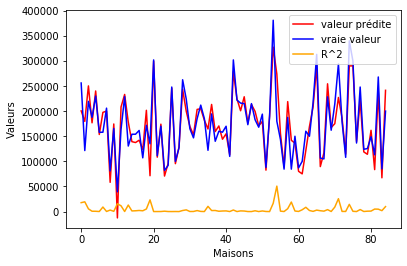

In [10]:
model = KernelRidge(alpha=1.0, kernel='linear', gamma=2, degree=3, coef0=1, kernel_params=None)
model.fit(X_train, y_train) 
y_pred = model.predict(X_val)

x=np.arange(0,len(y_val),1) # creation d'une graduation en abscisse
y_pred = y_pred.tolist() # on se retrouve avec une matrice (ce sera plus simple pour R_2)

#R_squared = ( ((y_val - y_val.mean()) ** 2).sum() - ((y_val - y_pred) ** 2).sum())/((y_val - y_val.mean()) ** 2).sum()
# (y_pred-y_val)**2/np.mean(y_val)

error_list = []
for i in range(0,len(y_val)): 
    error = ((y_pred[i] - y_val["SalePrice"][i])**2)/(y_val.mean())
    error_list.append(error)

print(f"Average error : {(sum(error_list)/len(error_list))[0]} $.")

mean = df['SalePrice'].mean()
print(f"Average Price : {mean} $.")

print(f"Pourcentage d'erreur : {((sum(error_list)/len(error_list))[0]/mean)*100} %.")

n = len(y_val)

plt.plot(x[:n], y_pred[:n], c='red', label= "valeur prédite")
plt.plot(x[:n], y_val[:n], c='blue', label= "vraie valeur")
plt.plot(x[:n], error_list[:n], c='orange', label = "R^2")
plt.xlabel("Maisons")
plt.ylabel("Valeurs")
plt.legend(loc = 'best')
plt.show();

On a donc 2.3% d'erreur sur la dataset de validation (la dataset qui nous permet de faire des ajustements), c'est un résultat qui paraît très intéressant. 

On va cependant vérifier que le modèle n'overfit pas sur la donnée d'entraînement.

# Test

In [11]:
# tests à venir